<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science  - Regresión Lineal</h1>

# <font color='red' style='font-size: 30px;'>Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [ ]:
# 1°) Importamos bibliotecas --->
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Bibliotecas opcionales

https://docs.python.org/3/library/warnings.html

In [ ]:
# import warnings # (Para que NO nos aparezca los WARNINGS de COLAB)
# warnings.filterwarnings("ignore") Para que no nos aparezca ningun warnings(no recomendado)
# warnings.filterwarnings(action="once") #Lo usaremos en un caso especifico solamente, puede ser pelogroso que NO nos aparezcan los warnings.

## El Dataset y el Proyecto
<hr>

### Fuente: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

Fuentes de datos para usar: UCI Machine Learning Repository, Kaggle, World Bank Open Data, Yahoo! Finance.

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>La cerveza es una de las bebidas más democráticas y consumidas del mundo. No sin razón, es perfecta para casi todas las situaciones, desde el happy hour hasta las grandes fiestas de bodas.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El objetivo de este proyecto es estimar un modelo de <b>Machine Learning</b> utilizando la técnica de <b>Regresión Lineal</b> para demostrar los impactos de las variables disponibles en este dataset sobre el consumo de cerveza (Y). Al final del proyecto, tendremos un modelo de predicción para el consumo medio de cerveza según los inputs de un conjunto de variables (X's).</p>


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los datos (muestra) fueron recolectados en São Paulo - Brasil, en un área universitaria, donde hay algunas fiestas con grupos de estudiantes de 18 a 28 años (en media).</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>fecha</b> - Fecha</li>
    <li><b>temp_media</b> - Temperatura Media (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>lluvia</b> - Precipitación (mm)</li>
    <li><b>fds</b> - Fin de Semana (1 = Sí; 0 = No)</li>
    <li><b>consumo</b> - Consumo de Cerveza (litros)</li>
</ul>

## Lectura de los datos

In [ ]:
# 2°) Creamos DataFrame --->

datos = pd.read_csv("Consumo_cerveza.csv", sep=";")

## Ver los datos

In [ ]:
datos

,fecha,temp_media,temp_min,temp_max,lluvia,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


## Verificando el tamaño del dataset

In [ ]:
# 3°) (lineas, columnas)
datos.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Analisis preliminar</font>

<hr style='border: 2px solid red;'>

Estudiaremos la relacion entre las VARIABLES del dataset, su comportamiento y sus estadisiticas descriptivas

## Estadísticos descriptivos

In [ ]:
# 1°) Creamos una tabla de la estadistica descriptiva de los datos --->

datos.describe()

,temp_media,temp_min,temp_max,lluvia,fds,consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


In [ ]:
# Redondeamos los numeros de las Variable a 2 decimales --->

datos.describe().round(2)

# La ESTADISTICA DESCRIPTIVA nos ayudara a encontrar el comportamiento raro en las Variables, datos atipicos, por ejemplo:
# La variable CONSUMO el valor MIN es de 14343.00 litros de creveza que se consumen por dia, el el MAX es de 37937.00 por dia
# de consumo, parece razonable esa diferencia, por ejemplo en la TEMP_MAX la  MIN de la ciudad de San Pablo es de 14.50 grados
# y la MAX es de 36.50 grados tambien parace razonable estos datos.

,temp_media,temp_min,temp_max,lluvia,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta y <b> +1 </b> indica asociación positiva perfecta.</p>

In [ ]:
# 2°) Vamos a tratar de identificar si hay realcion lineal entre el CONSUMO y las otras Variables, como primer antes de construir un modelo
# de REGRESION LINEAL y nos devuelve una medida de COEFICIENTE DE CORRELACION --->

datos.corr().round(4)
# Funcion CORR() = para que nos de la correlacion entre variables.

# ¡¡¡ En el CONSUMO que es lo que queremos predecir, vemos que en la relacion a la TEMP_MEDIA hay una CORRELACION POSITIVA de 0.5746, vemos
# tambien una buena CORRELACION entre el CONSUMO y TEMP_MAX(positiva alta), y asi vamos viendo la CORRELACION que existe entre el consumo
# y todas las demas variables. !!!


<ipython-input-83-c20c268f79c2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.corr().round(4)


,temp_media,temp_min,temp_max,lluvia,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
lluvia,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


 Definicion del Aula :

 En modelos de regresión lineal, es importante verificar si las variables explicativas (X’s) tienen una fuerte correlación con la variable dependiente (Y).

En modelos de regresión lineal, es importante que las variables explicativas (X’s) no tengan una fuerte correlación entre sí.
Como por ejemplo, temp_media con temp_min (0.8628) o temp_media con temp_max (0.9225)

# <font color='red' style='font-size: 30px;'>Comportamiento de la variable dependiente (Y)</font>
<hr style='border: 2px solid red;'>

# Análisis grafico

## Dibujando el plot de la variable *dependiente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

Variable DEPENDIENTE CONSUMO diario de cerveza.

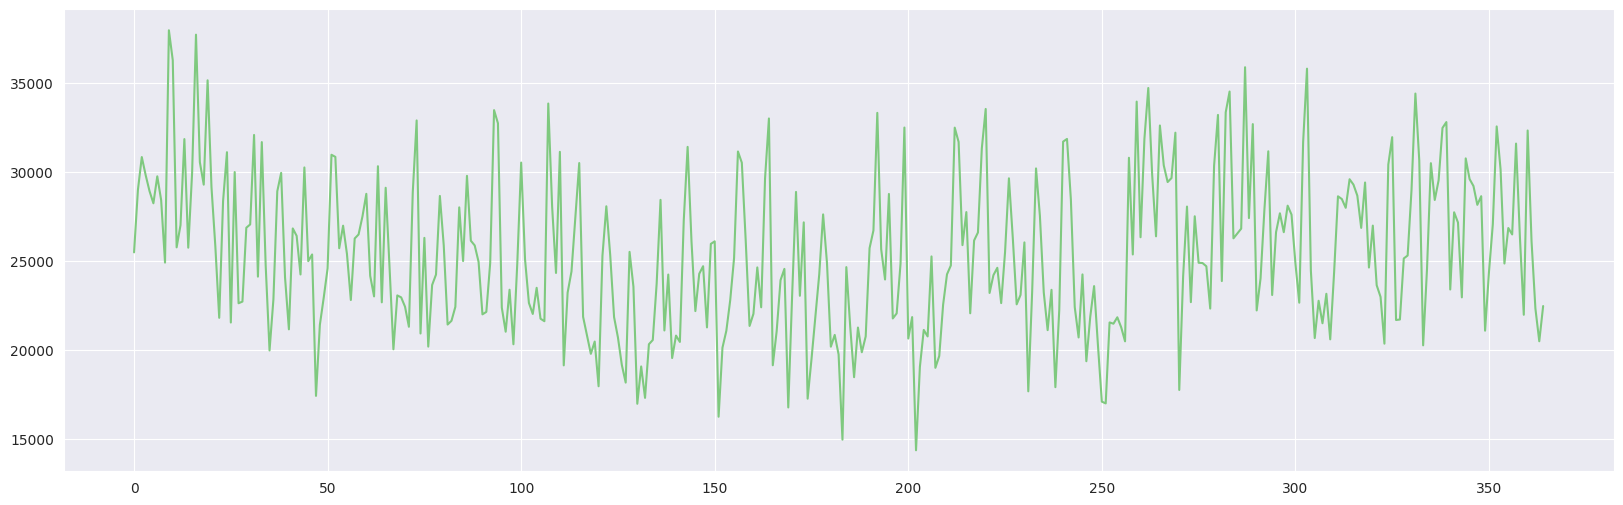

In [ ]:
# 1°) Analisis grafico de CONUSMO , que es una SERIE TEMPORAL ya que es medida a lo largo del tiempo, es importante visualizarla con el
# grafico de lineas de plot --->

fig, ax=plt.subplots(figsize=(20,6)) # Fisonomia del grafico, mas grande o mas chico.

ax=datos['consumo'].plot()

# Nos devuelve la evolucion del CONSUMO, a lolargo del año 2015, el objetivo es ver que el CONSUMO NO tenga algun cambio estructural.
# Vemos que desde ENERO hasta la mitad el año hay una baja de CONSUMO  de cerveza y despues vuelve a subir hasta DICIEMBRE, lo que podria ser explicado por la
# TEMPERATURA, en meses mas frios el CONSUMO tiende a caer, lo que NO queremos ver es una caida muy REPENTINA y ABRUPTA(cambio estructural), estos cambios
# son dificil de moelar y requieren que usemos modelos mas avnazados de REGRESION  que NO veremos en este modulo.

Text(0.5, 0, 'Días')

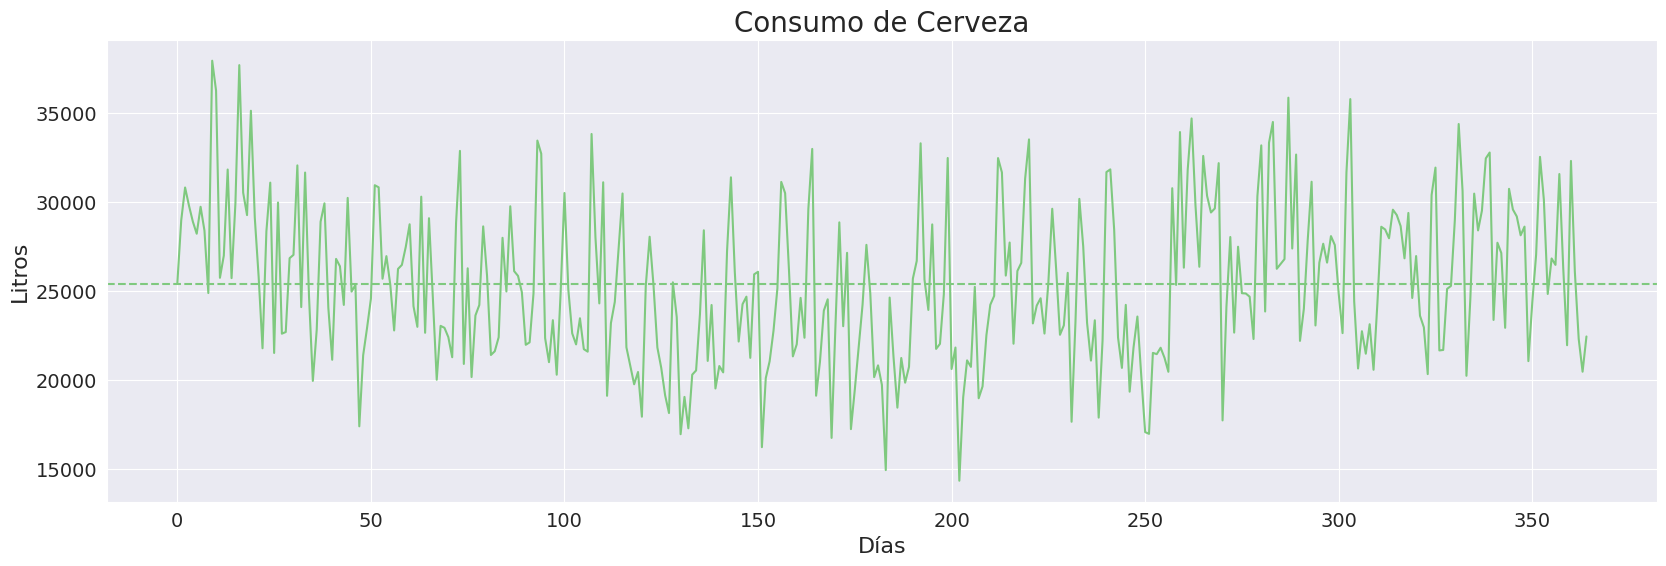

In [ ]:
# 2°) Para ve mejor el cuadro podemos introducir una linea que represente el PROMEDIO de la variable CONSUMO --->

fig, ax=plt.subplots(figsize=(20,6))

ax=datos['consumo'].plot(fontsize=14)
ax.axhline(y=np.mean(datos["consumo"]), ls="--")
ax.set_title("Consumo de Cerveza", fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Días', fontsize=16)

# Nos devuelve la LINEA punteada del promedio(mean) del Consumo que es de  25401.37 litros de cerveza.


# <font color='red' style='font-size: 30px;'>Box Plot (Diagrama de caja)</font>



<hr style='border: 2px solid red;'>

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

## Importando la biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos.</p>

In [ ]:
# 1°)
import seaborn as sns

## Box plot de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: ylabel='consumo'>

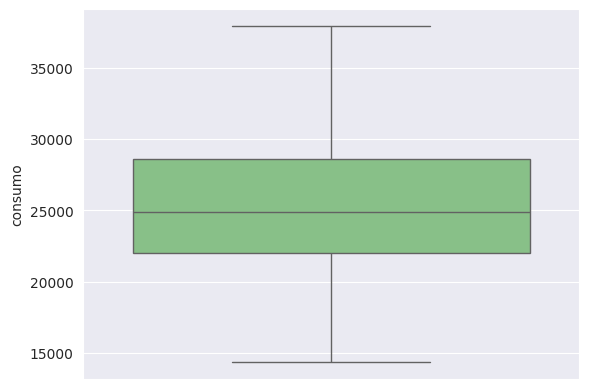

In [ ]:
# 2°) Creamos boxplot de consumo(variable dependiente) --->

sns.boxplot(data = datos["consumo"])

<Axes: ylabel='consumo'>

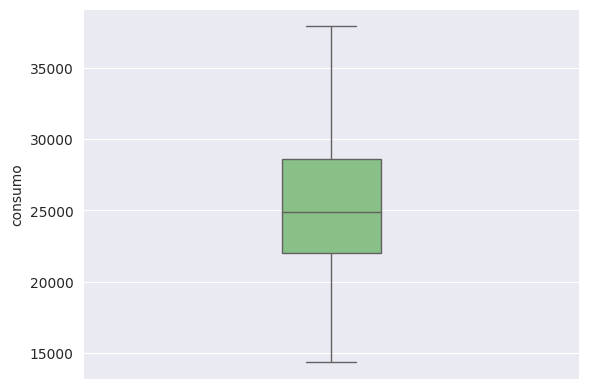

In [ ]:
# Para ver mejor el BOXPLOT ya que esta muy largo, lo reducimos y orientamos Vertical --->

sns.boxplot(data = datos["consumo"], orient = "v", width = 0.2)

# Podemos ver que NO hay puntos fuera de los limites y podemos decir que NO hay datos atipicos en la muestra del CONSUMO, vemos que la
# linea que representa la MEDIANA esta mas o menos a la mitad de la caja, por lo que podemos decir que la Distribucion de los datos del
# CONSUMO es ligeramente ASIMETRICA.

<Axes: title={'center': 'Consumo de Cerveza'}, ylabel='Litros'>

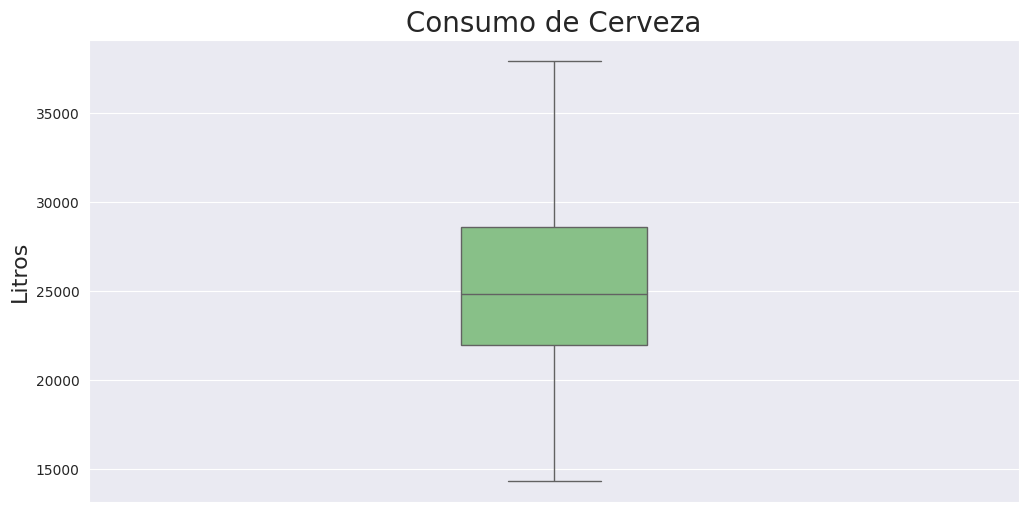

In [ ]:
# 3°) Vamos a darle nombress especificos, para facilitar futuros cambios en el grafico, pero antes tenemos que asignarle
# un objeto(AX) --->

ax = sns.boxplot(data = datos["consumo"], orient = "v", width = 0.2)
ax.figure.set_size_inches(12,6) # tamaño
ax.set_title("Consumo de Cerveza", fontsize = 20) # titulo y tamaño del titulo
ax.set_ylabel("Litros",fontsize = 16) # nombre de Y
ax # para que NO aparezca text por defecto

Definicion Aula:

¿Por qué usar un boxplot?

 Dos de las principales características de un boxplot es la posibilidad de identificar la simetría o asimetría (figura abajo) del conjunto de datos y la presencia de outliers.



# <font color='red' style='font-size: 30px;'>Box Plot con Dos Variables</font>
<hr style='border: 2px solid red;'>

## Analizar la variable *dependiente* (y) de acuerdo con una característica dada

<Axes: title={'center': 'Consumo de Cerveza'}, xlabel='Fin de Semana', ylabel='Litros'>

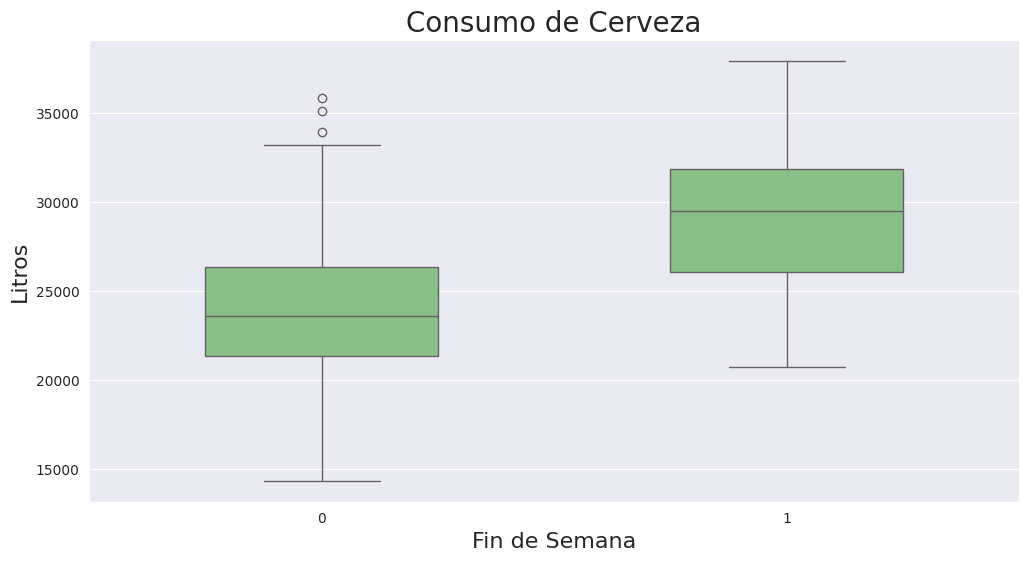

In [ ]:
# 1°) Vamos a separar la Variablbe el CONSUMO por la Variable categorica FIN DE SEMANA(FDS), usamos 2 parametros(x,y) mas de
# entrada en nuestro BOXPLOT --->

ax = sns.boxplot(y = "consumo", x = "fds", data = datos, orient = "v", width = 0.5)
ax.figure.set_size_inches(12,6)
ax.set_title("Consumo de Cerveza", fontsize = 20)
ax.set_ylabel("Litros",fontsize = 16)
ax.set_xlabel("Fin de Semana",fontsize = 16) # Agremaos la variable x
ax

# En el eje X tenemos 2 Categorias, una para el CONSUMO(0, dias de semana) y otra para el FIN DE SEMANA(1)
# El primer BOXPLOT calcula estadistico de los dias que NO son fin de semana, y el segundo calcula estadistico para los dias que son FIN DE SEMANA
# Comparando los 2 BOXPLOT podemos ver que el CONSUMO tiende a caer caundo NO es fin de semana(azul), y la estadistica promedio(mediana) aumenta
# durante el FIN DE SEMANA(naranja), intuitivamente tiene sentido por que el FIN DE SEMANA la gente esta mas libre y bebe mas cerveza que durante
# la semana.
# Los PUNTO(outliers) fuera el BOXPLOT de dias de semana pueden deberse a dias festivos que generan mayor consumo de creveza.

## Configuración de color y estilo de la biblioteca *seaborn*

Si deseo cambiar el ESTILO y COLOR se puede consultar los documentos de los LINKS--->

### Control de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de colores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [ ]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
# sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
# sns.set_style("darkgrid")


<Axes: title={'center': 'Consumo de Cerveza'}, xlabel='Fin de Semana', ylabel='Litros'>

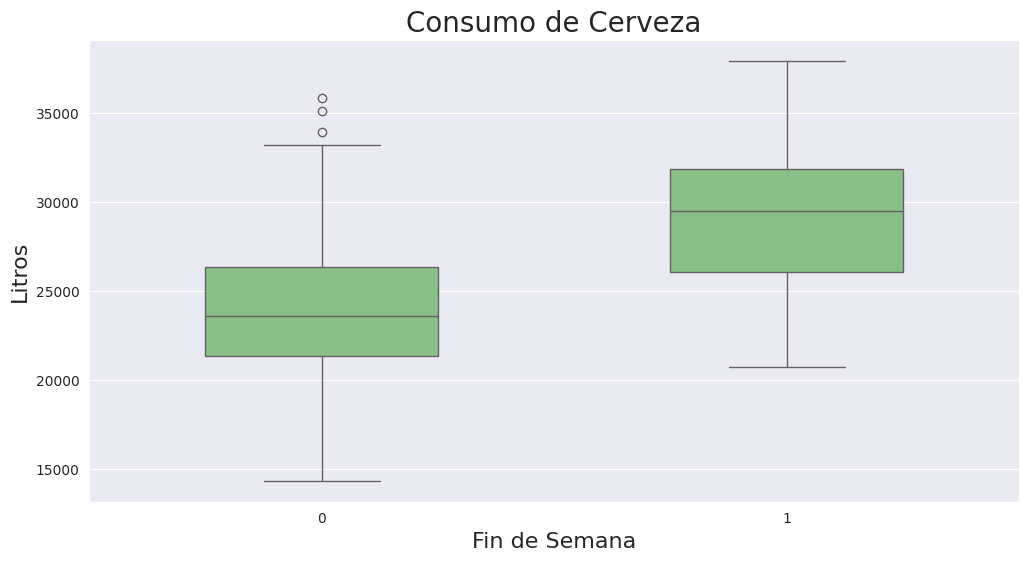

In [ ]:
# Podemos agregar ese ESTILO y COLOR al codigo de nuestr BOXPLOT --->
sns.set_palette("Accent")
sns.set_style("darkgrid")

ax = sns.boxplot(y = "consumo", x = "fds", data = datos, orient = "v", width = 0.5)
ax.figure.set_size_inches(12,6)
ax.set_title("Consumo de Cerveza", fontsize = 20)
ax.set_ylabel("Litros",fontsize = 16)
ax.set_xlabel("Fin de Semana",fontsize = 16) # Agremaos la variable x

ax

<Axes: title={'center': 'Consumo de Cerveza'}, xlabel='Litros', ylabel='Final de Semana'>

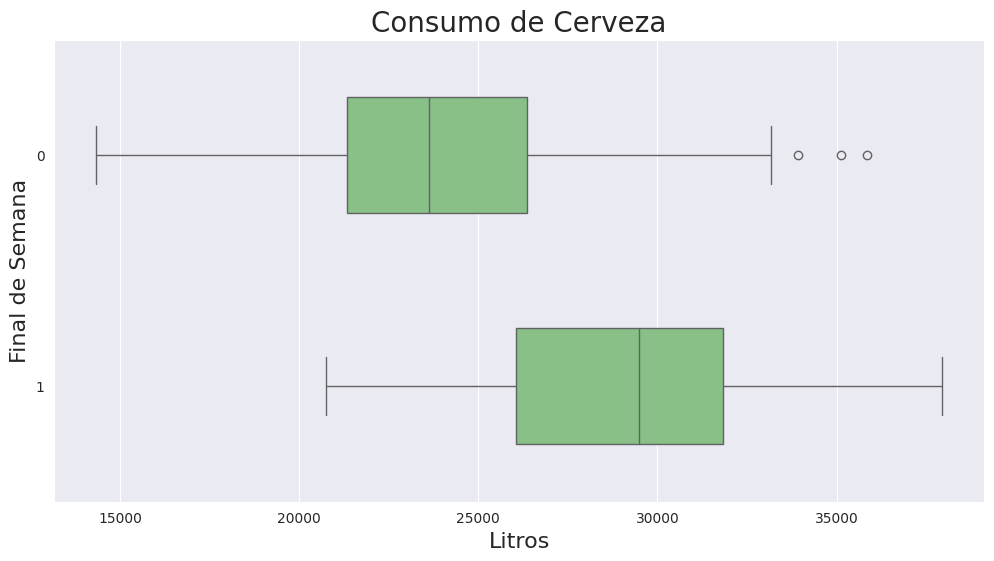

In [ ]:
# Aula ---> Usando nuestro dataset, ejecutaremos el siguiente código para obtener el boxplot del consumo de cerveza según la variable de fin de semana
# Tenga en cuenta que es el boxplot construido en nuestra clase, cambiando solo la orientación (orient='h')
ax = sns.boxplot(y='fds', x='consumo', data=datos,    orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveza', fontsize=20)
ax.set_xlabel('Litros', fontsize=16)
ax.set_ylabel('Final de Semana', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>Distribución de frecuencias (Histograma)</font>
<hr style='border: 2px solid red;'>

## Distribución de frecuencias de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<ipython-input-94-d73a8818c766>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos["consumo"])


<Axes: title={'center': 'Distribucion de Frecuencia'}, xlabel='consumo', ylabel='Consumo de Cerveza(Litros)'>

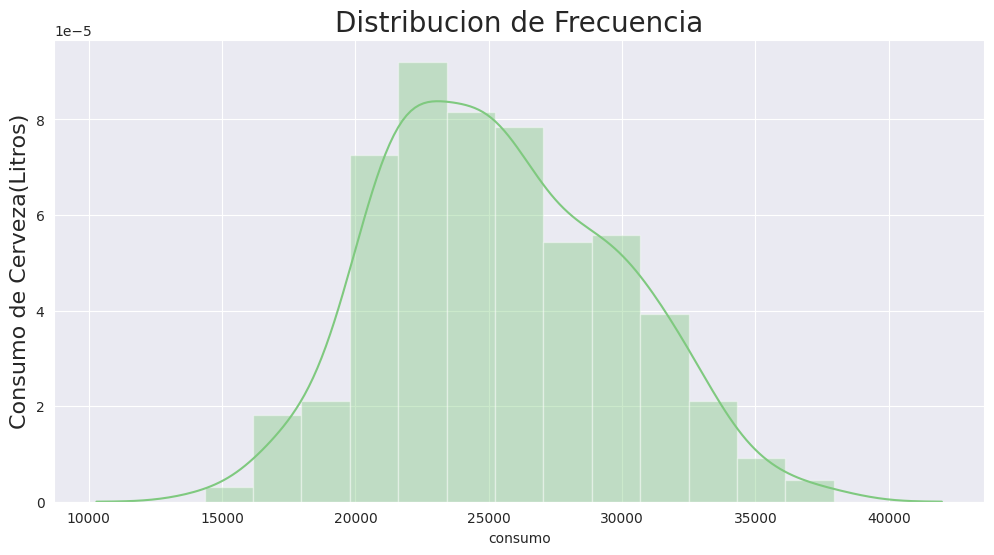

In [ ]:
# 1°) Distribucion de FRECUENCIAS del CONSUMO, la variable dependiente y con Histrograma, lo hacemos porque en los MODELOS DE REGRESION
# que es lo que estamos viendo en este aula, siguen una DISTRIBUCION NORMAL, con forma de campana, en casos como este de la vida real es muy
# dificil que siga una DISTRIBUCION NORMAL de campana, para la idea es utilizarla igual para distribucion normal, si fuera SIMETRICA la MEDIANA
# estaria justo al medio de la CAJA y en este caso esta casi el medio, por eso la usarmos igual.
# Usaremos DISTPLOT para HISTOGRAMA --->

ax = sns.distplot(datos["consumo"])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribucion de Frecuencia', fontsize=20)
ax.set_ylabel('Consumo de Cerveza(Litros)', fontsize=16)

ax


# Podemos ver una pequeña ASIMETRIA, cola a la derecha, pero la tomaremos igual para analisis como SIMETRICA(casi) para Distribucion Normal
# que es lo que contiene un REGRESION LINEAL.

Definicion Aula:


*  Los métodos estadísticos más conocidos asumen que la variable dependiente sigue la distribución normal.
*   Una forma preliminar de conocer la hipótesis de normalidad de la variable dependiente es a través del histograma.
*  Una de las funciones de la biblioteca seaborn para graficar el histograma de una variable es distplot().
*   En algunos casos, no se puede aceptar la hipótesis de normalidad. Veremos en otros cursos cómo proceder en este tipo de situaciones.








# <font color='red' style='font-size: 30px;'>Variable Dependiente X Variables Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión (scatterplots) entre las variables del dataset

Nos centramos en la relacion de la VARIABLE DEPENDIENTE(CONSUMO) y LAS EXPLICATIVAS(RESTO DE LAS VARIABLES), en el cuadro de CORRELACION que hicimos  mas adelante, vemos que el CONSUMO tiene una correlacion alta con la TEMPERATURA MAXIMA(0.6427) que con el resto de las temparaturas y vimos que el CONSUMO tiene una CORRELACION NEGATIVO CON LA LLUVIA(-0.1938) y POSITIVO CON EL FIN DE SEMANA(0.5060), tambien vimos que los VARIABLE EXPLICATIVAS como TEMP_MAX, LLUVIA, FDS y su correlacion entre ellas son debiles(0.9225, 0.0244, -0.0508), usaremos esto para los graficos de diagrama de DISPERSION, lo haremos tambien con todas las VARIABLES EXPLICATIVAS.

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre pares de variables en un dataset.</p>

## Graficar el pairplot fijando solo una variable en el eje y.

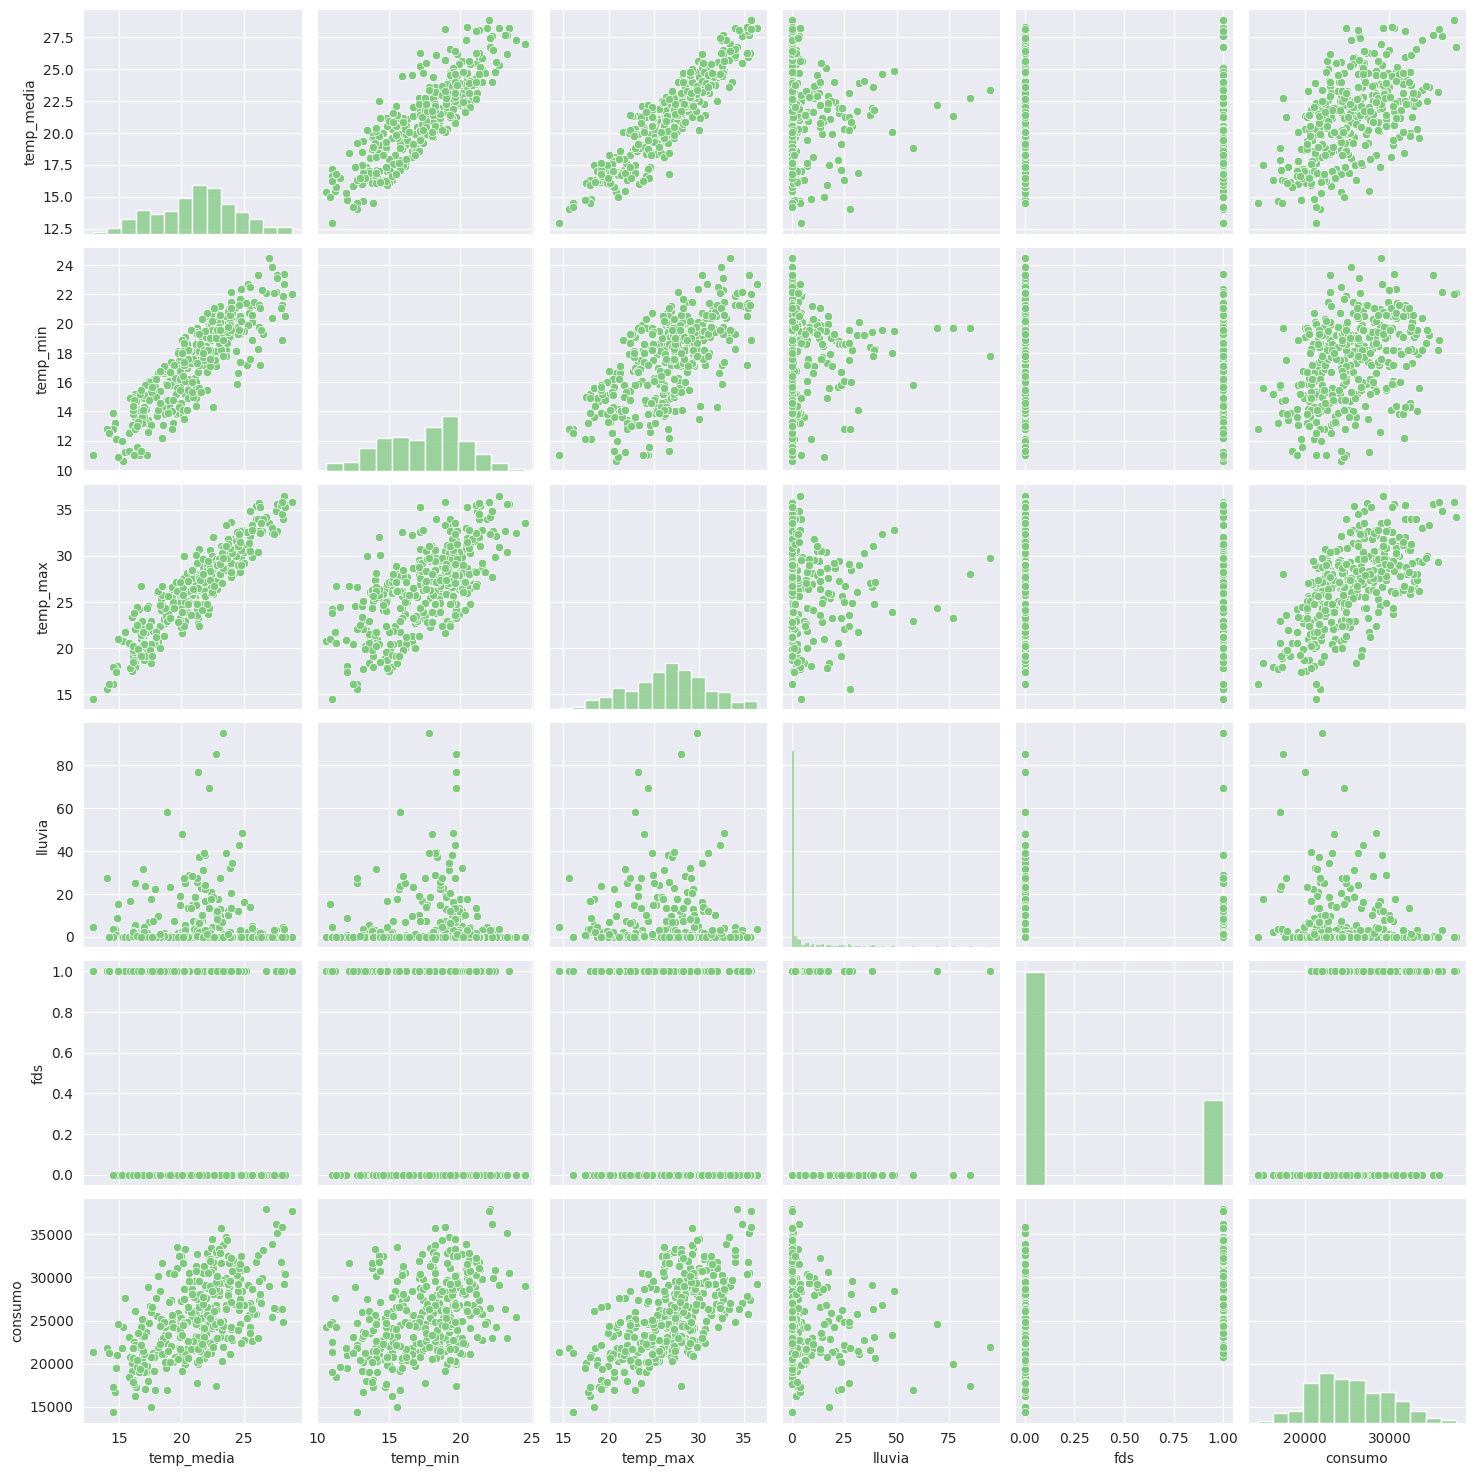

In [ ]:
# 1°) Graficamos la realacion entre pares de variables del dataset, grafico de dispersion(scatterplot) ---->

sns.pairplot(datos)

# Nos devuelve todas las Variables del Dataset, si tenemos muchas variables la visualizacion sera dificil, lo que nos obligaria hacer una
# SCATTERPLOT individual para cada caso, este grafico nos muestra la relacion de todas las variables, pero solo nos interesa la relacion del
# CONSUMO con todas las variables, nos centramos entonces en la ultima linea del grafico.


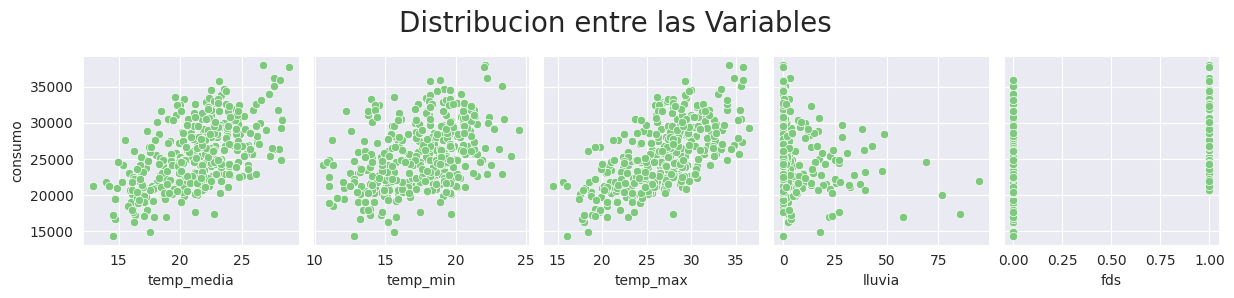

In [ ]:
# 2°) Graficamos el PAIRPLOT fijando solo una variable en el eje Y --->

ax = sns.pairplot(datos, y_vars = "consumo", x_vars = ["temp_media", "temp_min", "temp_max", "lluvia", "fds"], diag_kind = None) # NO queremos las diagonales que son los Histogramas
ax.fig.suptitle("Distribucion entre las Variables", fontsize = 20, y = 1.15) # Para que NO se suerponga el titulo.
ax

# Nos devuelve la realcion del CONSUMO con las demas Varibles, son 5 graficos de DISPERSION, podemos ver una cierta relacion entre el CONSUMO y la
# TEMP_MEDIA y TEMP_MIN a medida que aumenta el consumo esas temperaturas aumentan y viseversa, lo mismo para con la TEMP_MAX pero su relacion LINEAL
# con el CONSUMO es mas fuerte, podemos ver una especie de RECTA CON PENDIENTE POSITIVA, si la colocamos vemos a ver que los ERRORES son menores que
# en los 2 primeros. Con respecto a la LLUVIA vemos una mayor DISPERSION de los puntos, una relacion LINEAL mas debil con el CONSUMO y vemos una concentracion
# de puntos en valor 0 ya que NO LLUEVE, luego podemos ver el FIN DE SEMANA que en una variable categorica con 2 categorias, segregando el CONSUMO
# entre consumo de semana(0.00) y consumo durante los fines de semana(1.00) donde podemos ver un aumento del consumo durante el FDS.

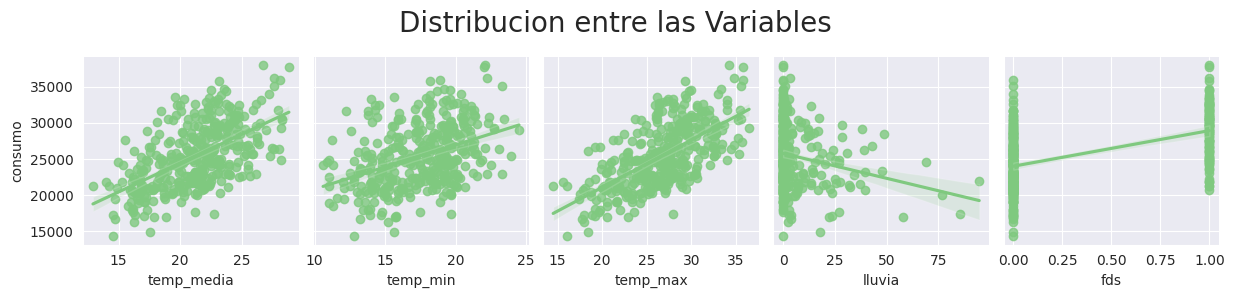

In [ ]:
# 3°) El grafico de PAIRPLOT permite incluir la RECTA LINEAL DE REGRESION --->

ax = sns.pairplot(datos, y_vars = "consumo", x_vars = ["temp_media", "temp_min", "temp_max", "lluvia", "fds"], diag_kind = None, kind = "reg") # KIND="REG" = Para agregar la RECTA
ax.fig.suptitle("Distribucion entre las Variables", fontsize = 20, y = 1.15)
ax

# Nos devuelve la RECTA en cada uno de los graficos, la relacion del CONUSMO con las otra variables y sus puntos de DISPERSION en la cercania a la RECTA, podemos
# ver que los puntos del SCATTERPLOT de la TEMP_MAX se ajustan mejor a la RECTA DE REGRESION.

Definicion Aula:

Usando gráficos de dispersión, podemos identificar si dos variables tienen una relación lineal entre ellas y también la dirección de esta relación.

# <font color='red' style='font-size: 30px;'>Variable Dependiente X Variables Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre dos variables y sus respectivas distribuciones de frecuencia.</p>

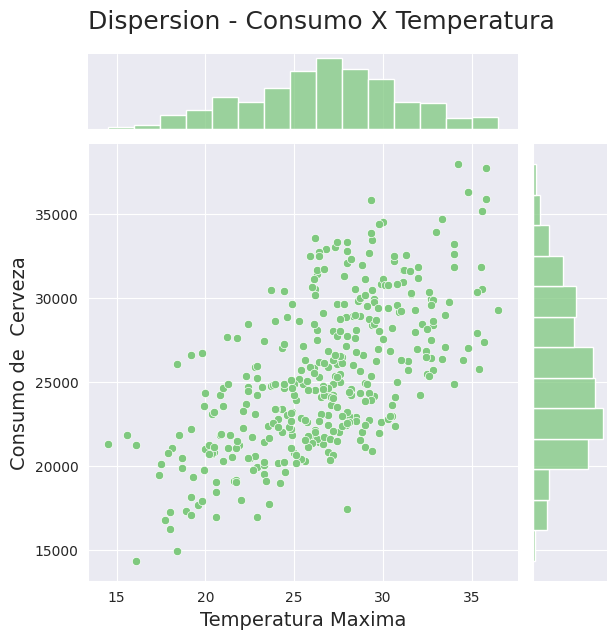

In [ ]:
# 1°) Graficamos la realicion entre 2 variables y su Frecuaencia en un JOINPLOT --->

ax = sns.jointplot(x="temp_max", y="consumo", data=datos)
ax.fig.suptitle("Dispersion - Consumo X Temperatura", fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Maxima", "Consumo de  Cerveza", fontsize=14)

# Nos devuelve un grafico con el mismo diagrama de DISPERSION que un PAIRPLOT, pero al mimso tiempo muestra la Distribucion de FRECUENCIA
# de las Variables, tambien podemos trazar la RECTA de Dispersion

## Graficar un jointplot con la recta de regresión estimada

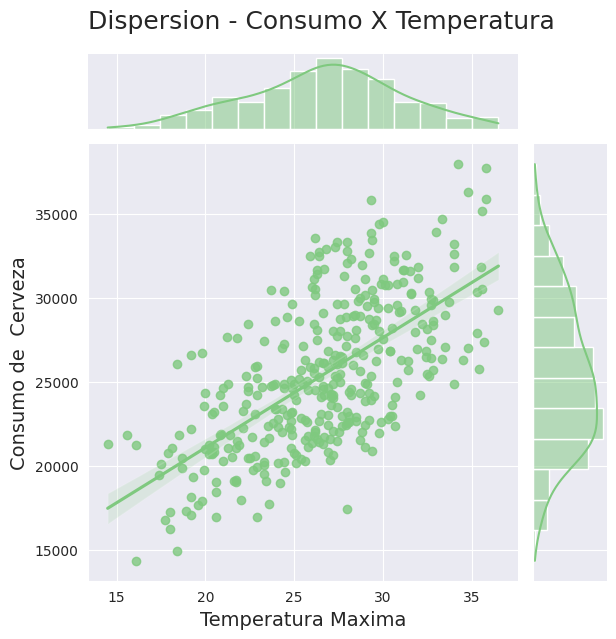

In [ ]:
# 2°) Graficamos el mismo JOINTPLOT pero con la RECTA DE REGRESION --->

ax = sns.jointplot(x="temp_max", y="consumo", data=datos, kind = "reg")
ax.fig.suptitle("Dispersion - Consumo X Temperatura", fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Maxima", "Consumo de  Cerveza", fontsize=14)

# Nos devuelve mismo grafico con Dispersion, la RECTA y en la FRECUENCIA con la CURVA en las 2 Variables.
# El JOINTPLOT, hace un analisis Variable por Variable y agrega la Frecuencia-

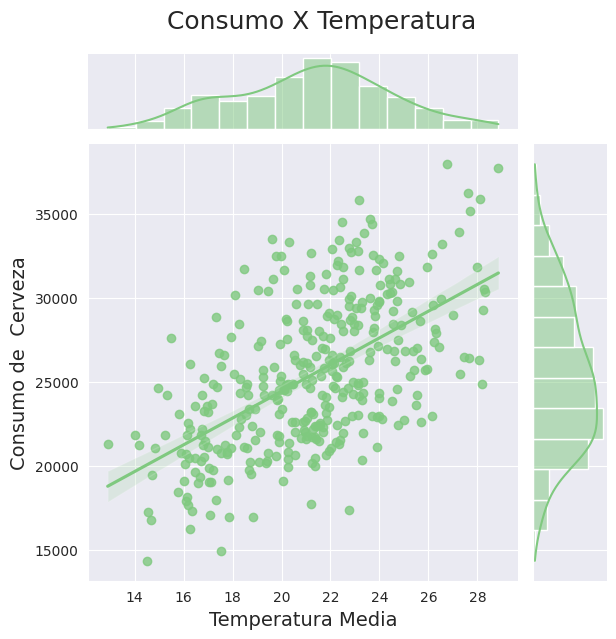

In [ ]:
# EJEMPLO DEL AULA, con otras 2 variables --->

ax = sns.jointplot(x="temp_media", y="consumo", data=datos, kind='reg')
ax.fig.suptitle('Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Media", "Consumo de  Cerveza", fontsize=14)

# Esta es el jointplot que construimos en la última clase con sólo dos modificaciones: la variable del eje x (temperatura media)
# y el parámetro kind = 'reg'.

# <font color='red' style='font-size: 30px;'>Variable Dependiente X Variables Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

Herramienta extra que hace un analisis similar a la se hizo con el PAIRPLOT y el JOINPLOT. Ahora usaremos el LMPLOT que hace algunas cosas adicionales.

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Trazar la recta de regresión entre dos variables junto con la dispersión entre ellas.</p>

In [1]:
# 1°) Trazamos la recta de regresion entre las 2 variables junto con la Dispersion entre ellas con grafico LMPLOT--->

ax = sns.lmplot(x="temp_max", y="consumo", data=datos)
ax.fig.suptitle('Recta de Regresion - Consumo X Temperatura', fontsize=18, y=1.02)
ax.set_xlabels("Temperatura Maxima (°C)", fontsize = 14)
ax.set_ylabels("Consumo de Cerveza(Litros)", fontsize = 14)
ax

# Nos devuelve lo que vimos en los graficos anteriores, diagrama de Dispersion entre el CONUSMO y TEMP_MAX y la
# RECTA DE REGRESION.


NameError: name 'sns' is not defined

## Graficar un lmplot con una tercera variable en el análisis (tipo I).

In [2]:
# 2°) Copiamos el mismo codigo de arriba pero agragemos algunos parametros adicionales, sparamos los valores para el CONSUMO y TEMP_MAX segun
# una TERCERA VARIABLE que sera la variable Categorica de FIN DE SEMANA, para ver la relacion de esta Variable y el efecto entre CONSUMO
# y TEMP_MAX, mas fin de semana o semana --->

ax = sns.lmplot(x="temp_max", y="consumo", data=datos, hue = "fds", markers = ["o", "*"], legend = False)
# HUE="FDS", Variable que segregara los valores de fds, MARKERS=["o", "*"], Para diferenciar las 2 categorias, Fin se semana(o), semana(*), LEGEND=FALSE, para cambiar nombre de FDS
ax.fig.suptitle('Recta de Regresion - Consumo X Temperatura', fontsize=18, y=1.02)
ax.set_xlabels("Temperatura Maxima (°C)", fontsize = 14)
ax.set_ylabels("Consumo de Cerveza(Litros)", fontsize = 14)
ax.add_legend(title = " Fin de Semana") # Lo agregamos una vez agregado legend = False
ax


# Nos devuelve FDS donde o, significa que NO es Fin de Semana representado por los circulos verdes(dispersion), y 1 que es Fin de Semana representado por asterisco
# en violeta(dispersion),  y como resultado tenemos 2 RECTAS DE REGRESIN en cada categoria y podemos ver el nivel de CONUSMO es mas alto los FIN DE SEMANA.

NameError: name 'sns' is not defined

## Graficar un lmplot con una tercera variable en el análisis (tipo II).

In [ ]:
# 3°) Graficamos LMPLOT con una TERCERA VARIABLE de analisis pero por separado en 2 graficos distintos el FDS(o,*) --->

ax = sns.lmplot(x="temp_max", y="consumo", data=datos, hue = "fds", col = "fds")
# Usamos COL="FDS", para separar el anterior grafico en 2, fds o y fds 1.
ax.fig.suptitle('Recta de Regresion - Consumo X Temperatura', fontsize=18, y=1.02)
ax.set_xlabels("Temperatura Maxima (°C)", fontsize = 14)
ax.set_ylabels("Consumo de Cerveza(Litros)", fontsize = 14)
ax.add_legend(title = " Fin de Semana")
ax

# Nos devueve el mismo grafico pero dividido en 2, o para cuando NO es Fin de Semana Y 1 para cuando es Fin de Semana y vemos la relacion
# entre el Consumo, temp_max y Fin de semana o NO Fin de Semana.


Definicion Aula:

La función lmplot() te permite generar dispersiones entre dos variables, según una tercera variable. En el caso anterior, se trata de un análisis de la relación entre el consumo de cerveza y la temperatura máxima, según la variable fin de semana.

# <font color='red' style='font-size: 30px;'>Estimando un Modelo de Regresión Lineal para el Consumo</font> (Machine Learning)
<hr style='border: 2px solid red;'>

# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relación con una o más variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de estas últimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El *scikit-learn* es un módulo de Python especializado en soluciones para *machine learning*.</p>

La biblioteca scikit-learn es de código abierto e incluye una serie de algoritmos para modelos de machine learning (clasificación, regresión, agrupación, etc.).



## Importando el *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# 1°) Dividimos los datos en un conjunto de ENTRENAMIENTO para estimar el MODELO y en un conjunto de PRUEBA para EVALUARLO,
# para ello usaremos la Funcion TRAIN_TEST_SPLIT de la biblioteca SCIKIT-LEARN --->

from sklearn.model_selection import train_test_split

## Creando una Series (pandas) para almacenar el Consumo de Cerveza (y).

In [ ]:
# 2°) Antes de usar la Funcion ella pide 2 Paramtros de entrada, primero y, variable dependiente en un DataFrame,
# almacenamos la variable CONUSMO DE CERVEZA --->

y = datos["consumo"]

## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [ ]:
# 3°) El segundo parametro en un DataFrame que contiene las Varibles Explicativas(X), usamos las que tienen una realcion buena con el
# CONSUMO, relacion fuerte, NO debil y que NO tengan CORRELACION fuerte entre ellas como vimos anteriormente ---->

X = datos[["temp_max", "lluvia", "fds"]] # X en mayuscula, doble [[]] corchete para mas de una Variable.

## Creando los datasets de entrenamiento y de prueba

In [ ]:
# 4°) Una vez creado los DataFrame podemos crear los DATASETS de entrenamiento y prueba -->

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2811)

# La funcion train_test_split no devuelve un lista de 4 elementos, por eso lo = a la funcion, luego le asignamos a cada
# elemento su debido contenido, respetando el orden en que aparacen en la lista.
# X_train(valores de variables Eplicativas-Entrenamiento), X_test(Nos dara los valores de las V.Explicativas asignadas al conj. de Pruebas)
# y_train(Esta relacionado con X_train y es la y(Consumo), del conj. de Entrenamiento), y_test(y del conj. de Prueba, realcionada a su vez con X_test)

# Parametro de la Funcion -->
# X, y = Variables
# TEST_SIZE = 0.3, Cantidad de % que vamos a separar para el conj. de PRUEBA, valor mas usado 0.3, 30% de los datos para Prueba al azar y el 70%
# para ENTRENAMIENTO del Modelo
# RANDOM_STATE=2811, Semilla para generar el mismo numero aleatorio de muestras.



## Comprobando los tamaños de los archivos generados por la función *train_test_split*.

In [ ]:
# 5°) Comprobando los tamaños de los archivos generados por la Funcion train_test_split, podemos verlos con el tamaño que
# nos devuelve X_train --->

X_train.shape

# Nos devuelve DataFrame con 255 lineas que son las 3 variables Explicativas, "temp_max", "lluvia", "fds".

(255, 3)

In [ ]:
X_test.shape

# Se asignaron 110 dias para el conjunto de Prueba Y 3 columnas de V. Explicativas.

(110, 3)

In [ ]:
X_train.shape[0] + X_test.shape[0]
# Podemos ver con esto que en total se tomaron 365 dias, 110 dias(30%) para la PRUEBA y 255 dias(70%) para ENTRENAMIENTO, [0]=para ver n de lineas, dias.

365

<img width='1000px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/reg_01.jpg'>




*   Y = Variable Dependiente CONSUMO.
*   B1 = Intercepto, es donde la recta de Regresion corta al eje Y.
*   B..= Betas restantes son las pendientes parciales del Modelo, tambien llamadas Coeficientes de Regresion.
*  X = Variables EXPLICATIVAS, X2 (temp_max), X3(lluvia), X4(fds).
*  U = Componente de ERROR, parte de la variacion de Y, no pudo ser explicada por nuestra ecuacion.
*  I = Representan los Datos.







## Importando *LinearRegression* y *metrics* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [ ]:
# 1°) Para estimar el Modelo usaremos la biblioteca SCIKIT-LEARN importamos la Funcion que estima el Modelo de Regresion Lineal
# LinearRegresion --->

from sklearn.linear_model import LinearRegression
from sklearn import metrics # La Funcion METRICS encargada de evaluar la calidad dela Estimacion del Modelo.

## Instanciando la clase *LinearRegression()*

In [ ]:
# 2°) Instanciando la Funcion LinearRegression(), la llamaremos Modelo, para facilitar la aplicacion en los proximos pasos --->

modelo = LinearRegression()

## Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
# 3°) Metodo FIT(), estimamos el modelo Lineal con los datos de Entrenamiento --->

modelo.fit(X_train, y_train)

LinearRegression()

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [ ]:
# 4°) Calculamos el COEFICIENTE DE DETERMINACION (R2) del modelo estimado con los datos de ENTRENAMIENTO, define el grado de ajuste de nuestra
# Linea de Regresion. COEFICIENTE DE DETERMINACION-R2 --> Es una medida de resumen que indica cuanto se ajusta la recta de regresion a los
# datos. Es un valor entre 0 y 1, cuanto explica nuestra Recta de Regresion la variacion de la Variable Dependiente --->

print("R² = {}".format(modelo.score(X_train, y_train)))

# R²(alt1021), .SCORE(funcion que calcula el Coeficiente de Determinacion R²)
# Redondeamos decimales.

R² = 0.7336167014928967


In [ ]:
# Redondeamos los Decimales --->

print("R² = {}".format(modelo.score(X_train, y_train).round(2)))

# El valor R² asume valores de 0 y 1, cuanto mas cerca de 1 es mejor el ajuste o bondad del modelo, inclusive con pocas Variables y datos
# ya tenemos un buen R² DE 0.73, razonable para un modelo de regresion.

# ESTO QUIERE DECIR QUE EL 73% DE LA VARACION MEDIA DEL CONSUMO PUEDE SER EXPLICADO POR LAS VARIABLES EXPLICATIVAS, SIN EMBARGO NO ES SUFICIENTE CON ESTE
# R² YA QUE ES UNA MEDIDA QUE EVALUA EL GRADO DE AJUSTE DEL MODELO EN LOS DATOS DE ENTRENAMIENTO, COMO NUESTRO PRINCIPAL OBJETIVO ES PRONOSTICAR EL
# CONSUMO DEBEMOS EVEALUAR EL PRONOSTICO DEL MODELO PARA ELLO DEBEMOS CONSTRUIR LOS PRONOSTICOS DEL CONSUMO (PREDICCIONES).

R² = 0.73


## Generando predicciones para los datos de ENTRENAMIENTO (X_test) con el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [ ]:
# 5°) Generemos PREDICCIONES para los datos del ENTRENAMIENTO(X_TEST) con el metodo .PREDICT()--->

y_predicho = modelo.predict(X_test) # Con esto construimos los pronosticos del CONSUMO

# modelo= nuestro modelo ya entrenado anteriormente(0.73), usamos el metodo PREDICT() y X_test(PRUEBA) para predecir el CONSUMO

## Obteniendo el coeficiente de determinación (R²) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [ ]:
# 6°) Comparamos los pronosticos del CONSUMO estimados por el modelo con los verdaderos valores, comparamos Y_PREDICHO con Y_TEST --->

print("R² = {}".format(metrics.r2_score(y_test, y_predicho).round(2)))

# CON BASE EN LOS DATOS DE PRUEBA TENEMOS UN R2 DE 69%, MENOS QUE EL R2 DE LOS DATOS DEL ENTRENAMIENTO, PERO EL VALOR SIGUE SIENDO RAZONABLE,
# LO QUE PODEMOS HACER PARA INTENTAR INCREMENTAR ESTE R2 QUE EVALUA EL PODER DEL PRONOSTICO DEL MODELO, ES INCREMENTAR EL NUEMRO DE VARIABLES
# EXPLICATIVAS Y TAMBIEN EL NUEMRO DE DATOS.

R² = 0.69


Definicion Aula:

Estimación de un modelo de regresión lineal, El coeficiente de determinación (R²) es una medida de resumen, que dice cuánto se ajusta la línea de regresión a los datos
El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable dependiente) en relación con una o más variables, las variables explicativas, con el objetivo de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de las últimas.

Recuerde que R² mide qué parte de la variación de la variable dependiente es explicada por el modelo estimado.

# <font color='red' style='font-size: 30px;'>Obteniendo Predicciones Puntuales</font>
<hr style='border: 2px solid red;'>

Una vez que tenemos un grado de ajuste y pronostico razonable podemos comenzar a pronosticar el CONSUMO de acuerdo con VALORES FUTUROS de las variables EXPLICATIVAS.

## Datos de entrata

In [ ]:
# 1°) Datos de Entrada, por ejemplo aqui tomamos la primera linea de X_test --->

entrada = X_test[0:1] # X_test(Explicativas, Prueba), [0:1]=Primera linea
entrada

# Para este dia tenemos 30 grados de temperatura maxima, 12 mm sw precipitacion y NO es fin de semana.

,temp_max,lluvia,fds
5,30.5,12.2,0


## Generando predicción puntual

In [ ]:
# 2°) En base a esos valores especificos o puntuales, podemos PREDECIR el CONSUMO de creveza usando un Modelo Estimado, usaremos
# usamos la Funcion PREDICT() --->

modelo.predict(entrada)[0] # usamos el MODELO estimado anterioremente, [0], para que nos devuelva el valor solo y NO el array.

# Podemos decir que para un dia que NO es fin de semana con una temperatura maxima de 30 grados y 12 mm de lluvia el CONSUMO MEDIO
# ESTIMADO DE CERVEZA SERA DE 26.094 LITROS en la ciudad de San Pablo.

26094.901775262017

## Creando un simulador simple

In [ ]:
# 3°) Creamos un simulador simple para crear PREDICCIONES del CONUSMO, primero creamo los nombres de las variables que ya tenemos --->

temp_max = 30.5 # Variables Explicativas con los valores de entrada de la primer linea
lluvia = 12.2
fds = 0

entrada = [[temp_max, lluvia, fds]] # Creamos la entrada para utilizar luego la funcion PREDICT()

print("{} Litros".format(modelo.predict(entrada)[0].round(2))) # agregamos el [0], para que solo devuelva valor

# Podemos confirmar que los resultados coinciden, nuestro simulador esta funcionando bien y de esta manera podemos cambiar los valores de
# las variablea Explicativias para ver como cambian las PREDICCIONES del Consumo.

26094.9 Litros


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Ejemplo --->

temp_max = 40
lluvia = 0
fds = 1

entrada = [[temp_max, lluvia, fds]]
print("{} Litros".format(modelo.predict(entrada)[0].round(2)))

# Con estos valores tenemos mas Consumo medio de litros de cerveza.

38742.53 Litros


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Definicion de Aula:

El método .predict() necesitamos pasar los valores de las variables explicativas como parámetros en la función, para obtener una predicción de la variable dependiente.

# <font color='red' style='font-size: 30px;'>Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

Interpretaremos el INTERCEPTO y los COEFICIENTES del Modelo con las 3 Variables
Explicativas.

<img width='1000px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/reg_02.jpg'>

## Obteniendo el intercepto del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> intercepto </b> representa el efecto medio en $ Y $ (Consumo de cerveza) con todas las variables explicativas excluidas del modelo. Dicho de otra forma, el <b> intercepto </b> representa el efecto medio en $ Y $ (consumo de cerveza) cuando $ X_2 $ (temperatura máxima), $ X_3 $ (lluvia) y $ X_4 $ (fin de semana ) son iguales a cero.</p>

In [ ]:
# 1°) El INTERCEPTO representa cuanto varia la Variable DEPENDIENTE en promedio cuando NO consideramos los EFECTOS de las Variables
# Explicativas, para ver su valor --->

modelo.intercept_

# El B1(Intercepto), sera el valor de 5951 litros de cerveza al dia, esperamos un consumo un CONSUMO medio de casi 6000 Litros de cerveza al dia
#, independientemente de las otras Variables.

5951.976339312445

## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b> coeficientes de regresión </b> $\beta_2 $, $\beta_3 $ y $\beta_4 $ son conocidos como <b> coeficientes de regresión parcial </b> o <b> coeficientes angulares parciales </b> . Considerando el número de variables explicativas en nuestro modelo, su significado sería el siguiente: $ \beta_2 $ mide la variación en el valor medio de $ Y $ (Consumo de cerveza) por variación unitaria en $ X_2 $ (Temperatura máxima), manteniéndose constantes los valores de $ X_3 $ (Lluvia) y $ X_4 $ (Fin de semana). En otras palabras, $ \beta_2 $ nos da el efecto "directo" o "neto" de una unidad de variación en $ X_2 $ sobre el valor medio de $ Y $, excluyendo los efectos que pueden tener $ X_3 $ y $ X_4 $ en el promedio de $ Y $. Del mismo modo podemos interpretar los demás coeficientes de regresión.</p>

In [ ]:
# 1°) Hacemos lo mismo que hicimos con B1 pero con COEFICIENTE --->

modelo.coef_ # Nos devuelve los coeficientes de las Variables

array([ 684.73675898,  -60.7824355 , 5401.08333866])

## Confirmando el orden de las variables explicativas en el DataFrame

In [ ]:
# 1°) Una vez que hicimos los anterior realizamoz un DATAFRAME uniendo a todos con sus respectivos nombres y variables EXPLICATIVAS,
# esto es util para representar los datos de una manera mas formal(Empresa), primero creamos las columnas con los nombres --->

X.columns # X = variables Explicativas


Index(['temp_max', 'lluvia', 'fds'], dtype='object')

## Creando una lista de nombres de las variables del modelo

In [ ]:
# 2°) Creamos los nombres de las V.Explicativas con cada BETA(B), para poner en el DataFrame --->

index = ["Intercepto", "Temperatura Maxima", "Lluvia(mm)", "Fin de Semana"]

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [ ]:
# 3°) Empezamos construyendo un DataFrame vacio, usamos Pandas --->

pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ["Parametros"])
# np.append=Para unir los valores de Intercept y Coef, Index= Nombres de las Variables q creamos mas arriba, columns=Titulo de los valores de las columnas.

,Parametros
Intercepto,5951.976339
Temperatura Maxima,684.736759
Lluvia(mm),-60.782435
Fin de Semana,5401.083339


## <font color='orange'> Interpretacion de los Coeficientes estimados.</font>(Respuesta de lo que realizamos arriba)


<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluyendo el efecto de las variables explicativas ($ X_2 = X_3 = X_4 = 0 $) el efecto medio en el Consumo de Cerveza sería <b> 5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C) </b> → Manteniendo constantes los valores de $ X_3 $ (Lluvia) y $ X_4 $ (Fin de Semana), el aumento de 1°C en la Temperatura Máxima genera una variación media en el Consumo de Cerveza de <b> 684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Lluvia (mm) </b> → Manteniendo constantes los valores de $ X_2 $ (Temperatura Máxima) y $ X_4 $ (Fin de Semana), la adición de 1 mm de Lluvia genera una variación media en el Consumo de Cerveza de <b > -60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Fin de semana (Sí / No) </b> → Manteniendo constantes los valores de $ X_2 $ (Temperatura máxima) y $ X_3 $ (Lluvia), el hecho de que el día se clasifique como Fin de semana genera una variación media en el consumo de cerveza de <b> 5401,08 litros</b>.
</p>


**PODEMOS VER QUE FIN DE SEMANA ES LA QUE MAS AFECTA AL CONSUMO, BETA(B) MAS ALTO**.

# <font color='red' style='font-size: 30px;'>Análisis gráfico de las predicciones del modelo</font>
<hr style='border: 2px solid red;'>

## Generando predicciones del modelo para los datos de ENTRENAMIENTO

Usaremos el Modelo de Entrenamiento para observar a traves de graficos si esas estimaciones estan en lo correcto.

In [ ]:
# 1°) Creamos Variable y lo igualamos al modelo que predecimos con la funcion Predict() con X_train, en base a los datos de Entrenamiento --->

y_predicho_train = modelo.predict(X_train)

## Gráfico de dispersión entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Para ver graficamente el ajuste del Modelo.

<Axes: title={'center': 'Predicion X real'}, xlabel='Consumo de Cerveza (Litros) - Prediccion', ylabel='Consumo de Cerveza (Litros) - Real'>

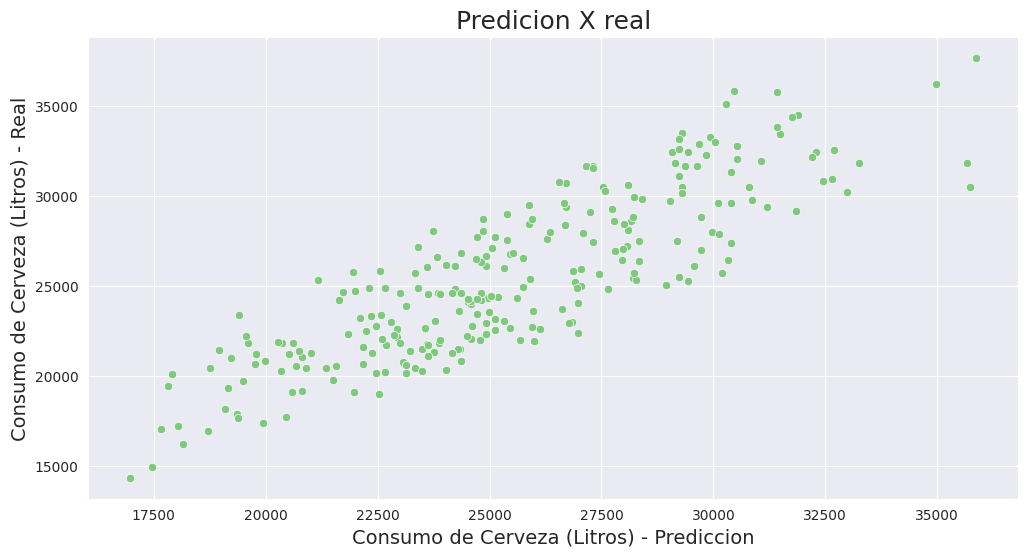

In [ ]:
# 2°) Usamos SCATTERPLOT para graficar los puntos de las variables --->

ax = sns.scatterplot(x=y_predicho_train, y=y_train) # x=predicion, y=real de consumo
ax.figure.set_size_inches(12,6)
ax.set_title("Predicion X real", fontsize = 18)
ax.set_xlabel("Consumo de Cerveza (Litros) - Prediccion", fontsize = 14)
ax.set_ylabel("Consumo de Cerveza (Litros) - Real", fontsize = 14)
ax

# Si imaginamos una RECTA DE REGRESION pasando por esos puntos podemos decir que los puntos se ajustan mas o menos a la recta de
# Regresion, sin embargo tenemos algunos problemas, los puntos al final de la recta parecen DISPERSOS para valores mas altos del
# Consumo, parece que el ajuste del Modelo es mejor para valores mas bajos del Consumo en el Modelo, esto NO es una buena señal!,
# para comprender lo que esta sucediendo debemos analizar los RESIDUOS del Modelo.

## Obteniendo los residuos

Los RESIDUOS que vamos a calcular son la Estimacion del elemnto Ui que simplemente es la Y_REAL - el resultado de la suma(b1+b2x2i+...)=Y_PREDICHO.

In [ ]:
# 3°) Creamos la Variable RESIDUOS --->

residuo = y_train - y_predicho_train # Consumo Real, Prediccion del Consumo
residuo

# Nos devuelve los valores de Residuos.

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

## Gráfico de dispersión entre valor estimado y residuos

Método informal para verificar la hipótesis de varianza constante de los residuos (homocedasticidad)

<Axes: title={'center': 'Predicion X real'}, xlabel='Consumo de Cerveza (Litros) - Prediccion', ylabel='Consumo de Cerveza (Litros) - Real'>

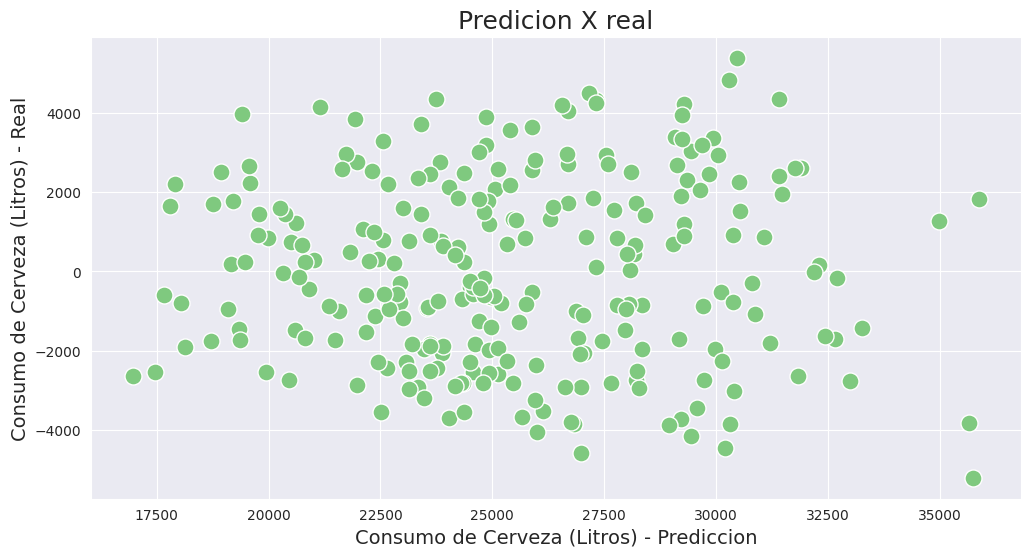

In [ ]:
# 4°) Con los RESIDUOS construimos un diagrama de DISPERSION entre los valores Estimados de Y y este Residuo --->

ax = sns.scatterplot(x=y_predicho_train, y=residuo, s=150) # x=predicion, y=residuo, s=150 para aumentar tamaño de los puntos.
ax.figure.set_size_inches(12,6)
ax.set_title("Predicion X real", fontsize = 18)
ax.set_xlabel("Consumo de Cerveza (Litros) - Prediccion", fontsize = 14)
ax.set_ylabel("Consumo de Cerveza (Litros) - Real", fontsize = 14)
ax

# Podemos ver que la Varacion de los RESIDUOS aumenta cuando el Consumo aumenta (valores), podemos ver que los Residuos al principio van desde
# -2000 aprox. hasta 4000 y luego en la mitad del grafico van casi desde -4000 hasta 5000, por lo tanto NO hay VARACION CONSTANTE en todo el proceso
# NO se cumple la HIPOTESIS DE VARIACION CONSTANTE(HOMOCEDASTICIDAD), lo que podemos hacer para comprobar que existe una Varicion Constante de la
# Varianza o NO de los residuos es crear este mismo grafico pero con los Residuos al cuadrado, asi vamos a tener solo valores POSITIVOS y esto
# facilita ver los patrones de comportamiento.

## Usando los residuos al cuadrado



<Axes: title={'center': 'Predicion X real'}, xlabel='Consumo de Cerveza (Litros) - Prediccion', ylabel='Consumo de Cerveza (Litros) - Real'>

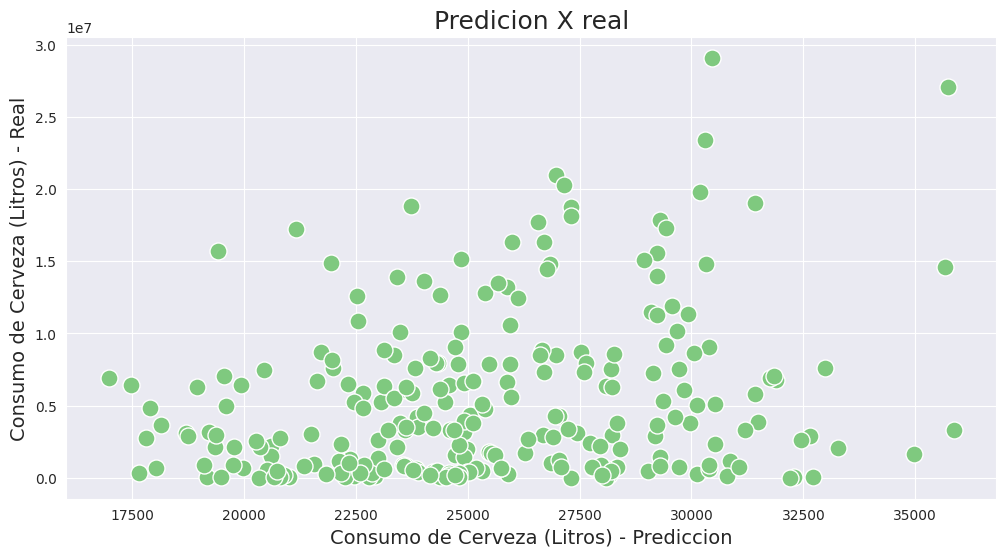

In [ ]:
# 5°) Para ver esos Puntos y Comportamientos Positivos al Cuadrado de los residuos --->

ax = sns.scatterplot(x=y_predicho_train, y=residuo**2, s=150) # x=predicion, y=residuo**"(agregamos **2)", s=150 para aumentar tamaño de los puntos.
ax.figure.set_size_inches(12,6)
ax.set_title("Predicion X real", fontsize = 18)
ax.set_xlabel("Consumo de Cerveza (Litros) - Prediccion", fontsize = 14)
ax.set_ylabel("Consumo de Cerveza (Litros) - Real", fontsize = 14)
ax

# Comparamos con los graficos de mas abajo, lo ideal seria que se parezca al PRIMER GRAFICO, donde vemos una Varianza Constante de
# los RESIDUOS, es decir en ese grafico los puntos permanecen dentro de un rango determinado, NO aumentan ni disminuyen a lo largo
# del proceso, NO queremos un comportamiento como en otros en los otros graficos.
# Podemos ver que nuestro SCATTERPLOT tiene un comportamiento similar al SEGUNDO GRAFICO que muestra un tendencia creciente de la Varianza
# de los RESIDUOS, esto indica que podemos tener una Varianza NO CONSTANTE(HETEROCEDASTICIDAD), un forma de disminuir esto seria aumentando
# los numeros de datos ya que estamos estimando con el 70% de 365, que es 255 datos, muy pocos.


<img width='1500px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/var_u.jpg'>
Fuente: Econometria Básica - 5ª edición - Gujarati y Porter

## Graficando la distribuición de frecuencias de los residuos

Para ver que tipo de comportamiento tienen esos RESIDUOS, graficamos Histograma.

<ipython-input-132-3ba65097410a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Distribucion de Frecuencias de los Residuos'}, xlabel='Litros', ylabel='Density'>

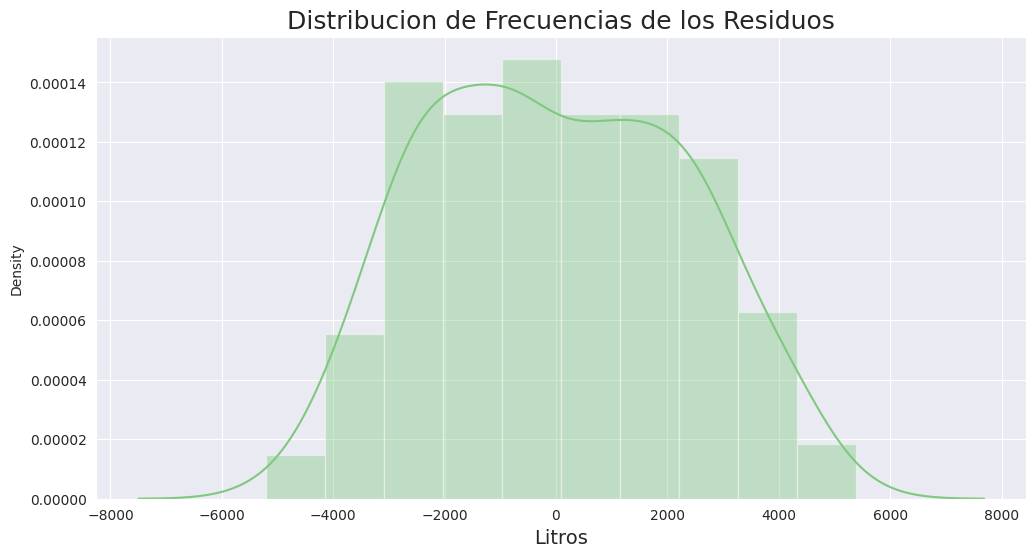

In [ ]:
# 6°) Grafico de Histograma de los RESIDUOS --->

ax = sns.distplot(residuo)
ax.figure.set_size_inches(12,6)
ax.set_title("Distribucion de Frecuencias de los Residuos", fontsize = 18)
ax.set_xlabel("Litros", fontsize = 14)
ax

# Vemos un grafico que se asemeja a un grafico Normal, pero para verlo mas detenidamente aumentamos las BARRAS.

<ipython-input-133-9db305ce3aec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo, bins=50) # Aumentamos Bins a 50


<Axes: title={'center': 'Distribucion de Frecuencias de los Residuos'}, xlabel='Litros', ylabel='Density'>

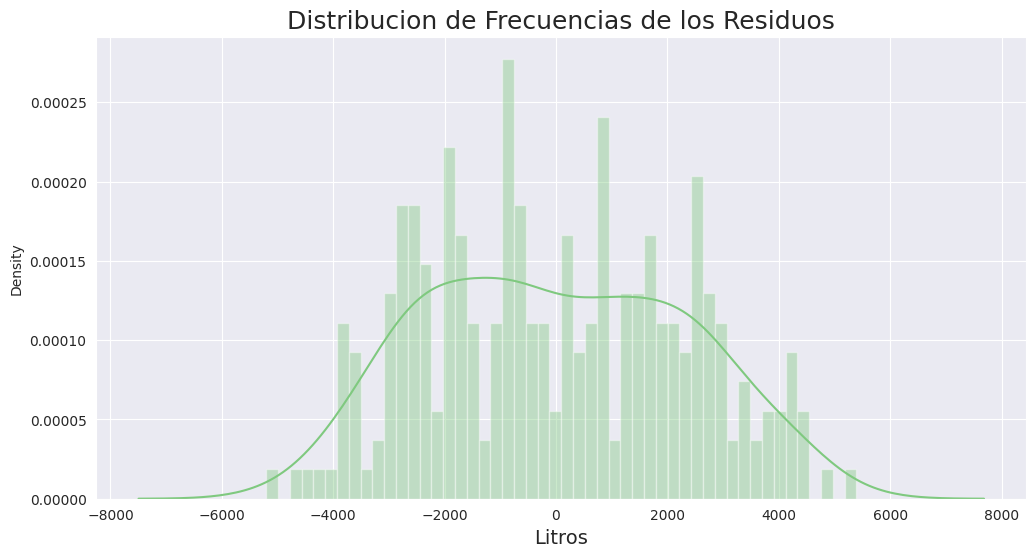

In [ ]:
# Aumentamos las BARRAS(Bins), para ver mejor el grafico de residuos --->

ax = sns.distplot(residuo, bins=50) # Aumentamos Bins a 50
ax.figure.set_size_inches(12,6)
ax.set_title("Distribucion de Frecuencias de los Residuos", fontsize = 18)
ax.set_xlabel("Litros", fontsize = 14)
ax

# Al aumentar las BARRAS a 50 vemos que la Distribucion NO ES SIMETRICA y tiene muchos picos por lo tanto NO podemos decir que
# los RESIDUOS son NORMALMENTE DISTRIBUIDOS.

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>

Vamos a trabajar comparando modelos, generalmente trabajamos con DataSets que tienen muchas variables y puede ser de interes probar diferente conjuntos de variables Explicativas, para ver cual representa mejor la variacion de la Variable Dependiente. Es muy comun esto en el trabajo del Cientifico de Datos.

<hr style='border: 2px solid red;'>

## Estimación de un nuevo modelo con la sustitución de la variable explicativa Temperatura máxima por Temperatura media.

In [ ]:
# 1°) Primer paso crear una nuevo conjunto de variables Explicativas, creamos nuevo Dataframe --->

X2 = datos[["temp_media", "lluvia", "fds"]]


## Creando los datasets de entrenamiento y de prueba

In [ ]:
# 2°) Definimos los conjuntos de Entrenamiento y Prueba, creamos los datasets, estimaremos el modelo utilizando el nuevo conjunto
# de Varibles Explicativas (TRAIN_TEST_SPLIT) --->

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size=0.3,random_state=2811)

## Instanciar la clase *LinearRegression()*

In [ ]:
# 3°) Renombramos el modelo --->

modelo_2 = LinearRegression()

## Usando el método *fit()* del objeto "modelo_2" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y2_train e X2_train)

In [ ]:
# 4°) Usamos el metodo FIT() para estimar el modelo con los datos de entrenamiento y prueba --->

modelo_2.fit(X2_train,y2_train)

LinearRegression()

## Obteniendo el coeficiente de determinación (R²) del nuevo modelo estimado y comparando con el resultado del modelo anterior

In [ ]:
# 5°) Calculamos R² y comparamos con el anterior modelo --->

print("Modelo con Temp. Media")
print("R² = {}".format(modelo_2.score(X2_train, y2_train).round(2)))

# Vemos que el Nuevo Modelo produce un R² mas BAJO, es decir que el Modelo Antiguo con Temp. Maxima se ajustan mejor los datos.


Modelo con Temp. Media
R² = 0.66


In [ ]:
print("Modelo con Temp. Maxima")
print("R² = {}".format(modelo.score(X_train, y_train).round(2))) # Modelo Antiguo

Modelo con Temp. Maxima
R² = 0.73


## Generando predicciones para los datos de PRUEBA (X_test e X2_test) con el método *predict()* de los objetos "modelo" e "modelo_2"

In [ ]:
# 6°) El Modelo antiguo era y_predicho= modelo.predict(X_test), ahora reenombramos el modelo nuevo y predeccimos --->

y_predicho_2 = modelo_2.predict(X2_test)

## Obteniendo el coeficiente de determinación (R²) para las predicciones de los dos modelos

In [ ]:
# 7°) Comparamos las PREDICCIONES de los 2 Modelos --->

print("Modelo con Temp. Media")
print("R² = {}".format(metrics.r2_score(y2_test, y_predicho_2).round(2)))

# Podemos concluir que el MODELO ANTIGUO explica mejor la Variacion del CONSUMO tanto en terminos de ajuste(R²=0.73) que el
# R² del MODELO NUEVO, como asi tambien en terminos de Pronostico.

Modelo con Temp. Media
R² = 0.66


In [ ]:
print("Modelo con Temp. Maxima") # Modelo Antiguo
print("R² = {}".format(metrics.r2_score(y_test, y_predicho).round(2)))

Modelo con Temp. Maxima
R² = 0.69


Definicion Aula:

* La comparación entre modelos solo es posible cuando la variable dependiente de los modelos que se comparan es la misma, la comparación entre modelos con diferentes variables dependientes no es válida.


* Una de las formas de evaluar la comparación y poder decidir cuál es el mejor modelo, es a través de la observación de los coeficientes de determinación de los modelos comparados. R² es una métrica que nos dice qué parte de la variación en la variable dependiente se explica por nuestro ajuste. Los valores más cercanos a 1 indican modelos mejor ajustados.

# <font color='red' style='font-size: 30px;'>Otras Métricas de Regresión</font>
<hr style='border: 2px solid red;'>

## Métricas da regresión
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algunas estadísticas obtenidas del modelo de regresión son muy útiles como criterio para comparar varios modelos estimados y seleccionar el mejor modelo. Las principales métricas de regresión que scikit-learn pone a disposición para los modelos lineales son las siguientes:

### <font color='orange'>Error Cuadrático Medio

Media de los cuadrados de los errores. Los mejores ajustes tienen un $EQM$ más bajo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### <font color='orange'>Raíz del Error Cuadrático Medio

Raíz cuadrada de la media de los cuadrados de los errores. Los mejores ajustes tienen un $\sqrt{EQM}$ más bajo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$






*   Al igual que el R² estas 2 Metricas son para generar el menor ERROR de pronosticos.






## Obteniendo métricas para el modelo con Temperatura Media

In [ ]:
# 1°) Vamos a calcular estas METRICAS en el Modelo que utiliza la TEMPERATURA MEDIA --->


# ERROR CUADRATICO MEDIO:

EQM_2=metrics.mean_squared_error(y2_test,y_predicho_2).round(2) # mean_squared_error=Funcion en lugar de R2_SCORE(R²)

# RAIZ DEL ERROR CUADRATICO MEDIO:

REQM_2=np.sqrt(EQM_2).round(2) # SQRT=raiz de eqm_2

# R²:

R2_2 = metrics.r2_score(y_test, y_predicho_2).round(2)

# Colocamos las 3 METRICAS en un DATAFRAME para comparar los 2 modelos:

pd.DataFrame([EQM_2, REQM_2, R2_2], ["EQM_2", "REQM_2", "R2_2"], columns=["Metricas"]) # En el primer [valores], segundo [nombre de los valores]


,Metricas
EQM_2,6060775.46
REQM_2,2461.86
R2_2,0.66


## Obteniendo métricas para el modelo con Temperatura Máxima

In [ ]:
# 2°) Ahora vamos a calcular estas METRICAS en el Modelo que utiliza la TEMPERATURA MAXIMA --->

EQM = metrics.mean_squared_error(y_test,y_predicho).round(2) # RAIZ DEL ERROR CUADRATICO MEDIO
REQM = np.sqrt(EQM).round(2) # RAIZ DEL ERROR CUADRATICO MEDIO
R2 = metrics.r2_score(y_test, y_predicho).round(2) # R²

pd.DataFrame([EQM, REQM, R2], ["EQM", "REQM", "R2"], columns=["Metricas"]) # Colocamos las 3 METRICAS en un DATAFRAME

# COMPARANDO LOS RESULTADOS DE LOS 2 MODELOS, PODEMOS VER QUE EL MODELO QUE UTILIZA LA TEMPERATURA MAXIMA PRODUCE MENORES ERRORES DE
# PREDICCION, YA QUE EQM Y REQM SUS VALORES SON MAS BAJOS QUE EN EL MODELO DE TEMPERATURA MEDIA Y PARA R2 ES MAYOR EN TEMPERATURA MAXIMA,
# CONSIDERANDO DE 0 A 1, 0.69 ESTA MAS CERCANO A 1 , MEJOR SE AJUSTA AL MODELO. PODEMOS CONCLUIR QUE EL MODELO ANTIGUO(TEMP_MAX) ES MAS
# APROPIADO PARA PREDECIR EL CONSUMO.


,Metricas
EQM,5471976.38
REQM,2339.23
R2,0.69


# <font color='red' style='font-size: 30px;'>Guardando y cargando el modelo estimado</font>

Guardamos el Modelo Estimado de Temperatura Maxima y sus resultados para que podamos usarlo para pronosticar el CONSUMO en caso que tengamos nuevos valores para las Variables Explicativas y generar nuevas PREDICCIONES en un nuevo notebook sin necesidad de repetir todo el procedieminto, esto solo se puede hacer si vamos a usar las mismas  Variables Explicativas, si incluimos una Variable de mas o cambiamos algunas de ellas tendremos que repetir todo el procedimiento de Estimacion.

<hr style='border: 2px solid red;'>

## Datos de entrada

In [ ]:
# 1°) DATAFRAME ya elaborado anteriormente --->

X_test[0:1]

entrada = X_test[0:1]
entrada

,temp_max,lluvia,fds
5,30.5,12.2,0


## Generando predicción puntual

In [ ]:
# 2°) Generamos Prediccion puntual en base al DataFrame realizado anteriormente --->

modelo.predict(entrada)[0]

# nos devuelve el consumo de cerveza segun los datos.

26094.901775262017

## Creando un simulador simple

In [ ]:
# 3°) Luego habiamos creado anteriormente este SIMULADOR SIMPLE que calcula el Consumo con valores arbitrarios de las Varibles Explicativas --->

temp_max = 30.5
lluvia = 12.2
fds = 0

entrada = [[temp_max, lluvia, fds]]

print("{} Litros".format(modelo.predict(entrada)[0].round(2)))

26094.9 Litros


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Guardando el modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El módulo <b> pickle </b> implementa protocolos binarios para serializar y deserializar la estructura de un objeto Python.</p>

Esta Funcion mantiene en la memoria el modelo ya estimado, lo guarda en un archivo Binario, en una carpeta, para que podamos usarlo posteriormente cuando y donde queramos.

In [ ]:
# 4°) Importamos PICKLE --->

import pickle

In [ ]:
# 5°) Le damos el nombre de OUTPUT --->

output = open("modelo_consumo_cerveza", "wb") # open = funcion, nombre del archivo, wb = metodo write binary
pickle.dump(modelo, output) #llamamos PICKLE, con DUMP agregamos el modelo estimado ya, y nuestro OUTPUT que es donde quedara el archivo
output.close() # Cerramos el OUTPUT

# SI HACEMOS CLICK EN EL LOGO DE ARCHIVO VEMOS QUE YA TENEMOS EL ARCHIVO GUARDADO, PARA QUE SE GUARDE EN LA PC TENEMOS QUE DESCARGARLO.

### En un nuevo notebook/proyeto Python

El codigo escrito lo dio el profesor, lo que hacemos es abrir un NUEVO CUADERNO que no tendra nada en su memoria y copiamos este codigo que es para leer el archivo que creamos mas arriba, pero antes tenemos que cargar ese archivo al nuevo cuaderno.

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveza','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, lluvia, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```

Definicion Aula:

-En nuestro curso, usamos la biblioteca pickle para guardar nuestro modelo estimado en un archivo binario. Este procedimiento nos permite reutilizar nuestro modelo, sin tener que volver a ejecutar todo el proceso de estimación.

-En nuestro proyecto solo se utilizaron dos características de la biblioteca pickle, una para almacenar el modelo en un archivo y la otra para cargar en la memoria el modelo almacenado en este archivo.

-pickle.dump() y pickle.load() ---> El módulo pickle implementa protocolos binários para serializar y deserializar la estructura de un objeto Python.

Mas Definiciones:

-El coeficiente de correlación es una medida de asociación lineal entre dos variables y está entre -1 y +1, donde -1 indica una asociación negativa perfecta y +1 indica una asociación positiva perfecta.

-El jointplot(), de la biblioteca seaborn, grafica la relación entre dos variables y sus respectivas distribuciones de frecuencia

-Recuerde que el ECM debe minimizarse y el R² debe maximizarse.

-Los diagramas de dispersión entre la variable dependiente (Y) y las variables explicativas (X’s) nos ayudan a identificar la presencia de una relación lineal entre las variables

-Mediante un histograma, podemos evaluar de forma preliminar si la variable dependiente sigue una distribución normal.

-El análisis gráfico es una técnica estadística muy importante en un proceso de creación de modelo.
